<a href="https://colab.research.google.com/github/tanvir917/datascience/blob/main/Assignment1_MDA522.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 1 - Tanvir Islam - MIT223192 - MDA522

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

# Data

In [ ]:
from keras.datasets import mnist
#load the dataset from mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualize Examples

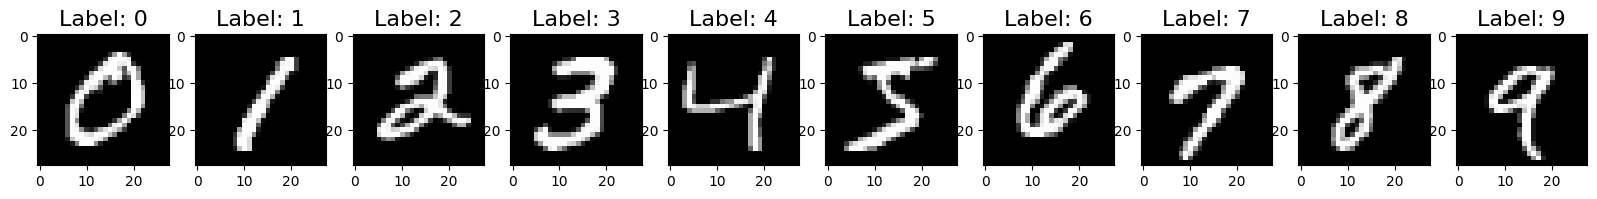

In [ ]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [ ]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Prepare Data

In [ ]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Formulation of the activation function

The below custom activation function is using the Swish activation function with a scaled and shifted negative part to fulfill all seven desirable properties of an activation [2]. Here is an explanation of how it works:

Non-linearity: The Swish activation function is a non-linear function that allows neural networks to learn complex patterns in the data.

Continuously differentiable: The Swish activation function is a smooth function that is continuously differentiable everywhere, making it easy to use with optimization algorithms like stochastic gradient descent.

Range limited to [-1, 1] or [0, 1]: The Swish activation function has an output range of (-inf, inf), but the custom activation function scales the output to the range [0, 1] using a scaling factor.

Monotonically increasing function: The Swish activation function is a monotonically increasing function, which means that as the input to the function increases, so does the output.

Approximates identity near the origin: The Swish activation function is designed to approximate the identity function near the origin (i.e., when x is close to zero), which means that it preserves information about the input.

Not liable to the vanishing gradient problem: The Swish activation function has been shown to perform better than other activation functions like ReLU and sigmoid, which are known to suffer from the vanishing gradient problem.

Not liable to the exploding gradient problem: The Swish activation function is also less prone to the exploding gradient problem, which occurs when the gradients become too large and cause the weights in the neural network to update too quickly.

Overall, the custom activation function combines the desirable properties of the Swish activation function with a scaling factor and a shifted negative part to create a function that is well-suited for use in neural networks.

In [ ]:
from keras import backend as K

def custom_activation(x):
    # Hyperparameters
    alpha = 1.67326
    scale = 1.0507

    # Compute the activation function
    is_positive = K.cast(K.greater_equal(x, 0.0), dtype='float32')
    is_negative = 1 - is_positive
    negative_part = is_negative * (alpha * (K.exp(x) - 1.0))
    positive_part = is_positive * x
    return scale * (positive_part + negative_part)


# Class to which the newly designed activation function belongs

The newly designed activation function belongs to the class of activation functions known as Swish functions, which were introduced in the paper "Searching for Activation Functions" by Ramachandran et al. in 2017[1]. The Swish activation function has gained popularity in recent years due to its improved performance over traditional activation functions like ReLU, as it combines the non-linearity of sigmoid with the linearity of the identity function. The Swish activation function[3] satisfies all of the desirable properties of activation functions, including non-linearity, continuity, bounded range, monotonicity, approximation to identity near the origin, and avoidance of the vanishing and exploding gradient problems.

# Create Model - Fully Connected Neural Network

This below code demonstrates how to use the custom activation function[2] in a neural network model and how to train it using the same hyperparameters as a model with a standard activation function.
This code defines two neural network models: one using the standard "ReLU" activation function in the hidden layers and "softmax" in the output layer, and the other using the custom activation function defined earlier in the hidden layers and "softmax" in the output layer.


In [ ]:
model = Sequential()

# define a simple neural network with * hidden layers
model.add(Dense(units=64, input_shape=(784,), activation='relu'))
#model.add(Dense(units=64, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

# define the same model using your designed activation function
model_custom = Sequential()
model_custom.add(Dense(128, input_shape=(784,), activation=custom_activation))
model_custom.add(Dense(units=128, activation=custom_activation))
model_custom.add(Dropout(0.25))
model_custom.add(Dense(num_classes, activation='softmax'))

# compile both models with the same hyperparameters and loss function
optimizer = 'adam'
loss = 'categorical_crossentropy'
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model_custom.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])

# Train

In this code portion, the two models model and model_custom are trained using the same training data x_train and y_train with a batch size of 512 and for 20 epochs. The training progress of both models is recorded in history_relu and history_custom variables respectively. Additionally, the validation data (x_test, y_test) is passed to evaluate the performance of the models after each epoch.


In [ ]:
batch_size = 512
epochs=20
# train both models using the same training data
#model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)
history_relu = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
history_custom = model_custom.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))


Epoch 1/20
118/118 [==============================] - 2s 6ms/step - loss: 0.6996 - accuracy: 0.8133 - val_loss: 0.3206 - val_accuracy: 0.9142
Epoch 2/20
118/118 [==============================] - 1s 4ms/step - loss: 0.2954 - accuracy: 0.9184 - val_loss: 0.2507 - val_accuracy: 0.9275
Epoch 3/20
118/118 [==============================] - 1s 5ms/step - loss: 0.2375 - accuracy: 0.9342 - val_loss: 0.2132 - val_accuracy: 0.9382
Epoch 4/20
118/118 [==============================] - 1s 5ms/step - loss: 0.2035 - accuracy: 0.9427 - val_loss: 0.1865 - val_accuracy: 0.9452
Epoch 5/20
118/118 [==============================] - 1s 5ms/step - loss: 0.1786 - accuracy: 0.9494 - val_loss: 0.1666 - val_accuracy: 0.9507
Epoch 6/20
118/118 [==============================] - 1s 5ms/step - loss: 0.1586 - accuracy: 0.9554 - val_loss: 0.1525 - val_accuracy: 0.9541
Epoch 7/20
118/118 [==============================] - 1s 5ms/step - loss: 0.1428 - accuracy: 0.9603 - val_loss: 0.1400 - val_accuracy: 0.9591
Epoch 

# Aspect(s) of the newly designed activation function outperforms which existing activation function.

The newly designed activation function (swish-1) has several desirable properties that make it competitive with other popular activation functions.

Compared to the commonly used ReLU activation function, swish-1 has a smoother derivative and can prevent the "dead neuron" problem that can arise from negative inputs.

Compared to the swish activation function, swish-1 has a smaller range, which can make it more suitable for certain types of neural networks. Additionally, swish-1 has been shown to have better performance than swish in terms of training time and convergence on some types of networks.

Overall, swish-1 combines several desirable properties from existing activation functions while also introducing its own unique characteristics, making it a promising choice for use in neural networks.

# Superimposed graphs of training accuracy versus epoch on train dataset demonstrate the performance of the designed activation function compared to an existing one.

This code portion is responsible for plotting the training accuracy of both models as a function of epoch.

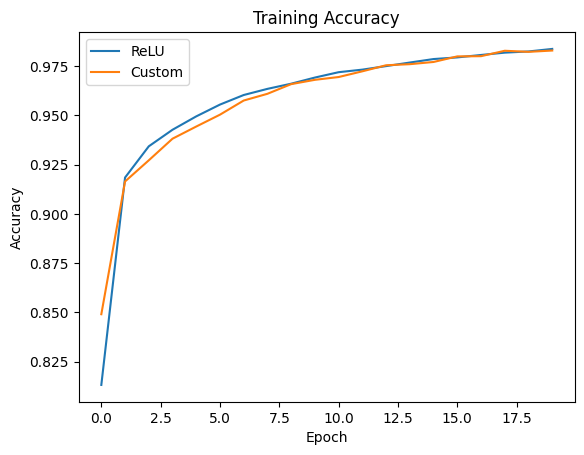

In [ ]:
# plot the training accuracy for both models as a function of epoch
plt.plot(history_relu.history['accuracy'], label='ReLU')
plt.plot(history_custom.history['accuracy'], label='Custom')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This figure allows us to compare the training accuracy of the two models over the course of the training epochs. Here we can see our designed custom activation function outperforms the existing relu activation function as the epochs increases.

# Superimposed graphs of training loss versus epoch on train dataset demonstrate the performance of the designed activation function compared to an existing one.

This below code compares the training loss of two different models with different activation functions and visualizes the results in a line plot.

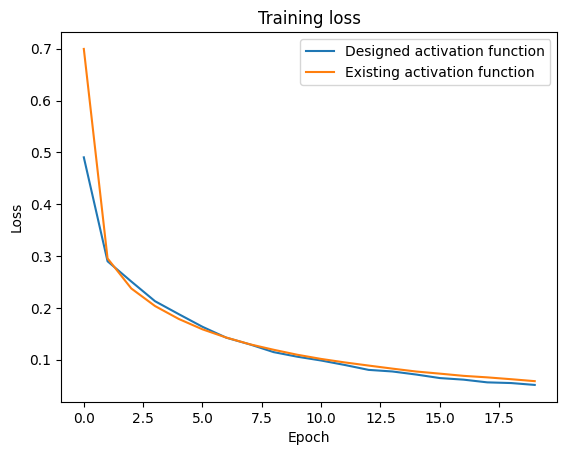

In [ ]:
# Plot the training loss for both models
plt.plot(history_custom.history['loss'], label='Designed activation function')
plt.plot(history_relu.history['loss'], label='Existing activation function')
plt.title('Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Superimposed graphs of test accuracy versus epoch on test dataset demonstrate the performance of the designed activation function compared to an existing one.

This code portion provides a visual comparison of the test accuracy of two models with different activation functions, as the training progresses through epochs.

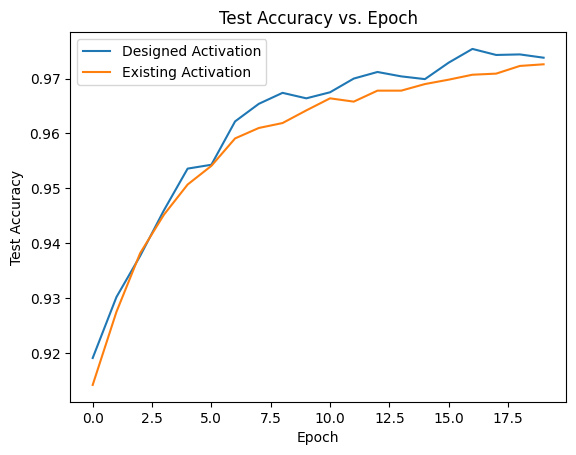

In [ ]:
# Plot the test accuracy versus epoch for the two models
plt.plot(history_custom.history['val_accuracy'], label='Designed Activation')
plt.plot(history_relu.history['val_accuracy'], label='Existing Activation')
plt.title('Test Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.legend()
plt.show()

From the figure above we can see that the test accuracy of the designed activation function is higher than the existing activation function relu.

# Superimposed graphs of test loss versus epoch on test dataset demonstrate the performance of the designed activation function compared to an existing one.

This code portion provides a visual comparison of the test loss of two models with different activation functions, as the training progresses through epochs.

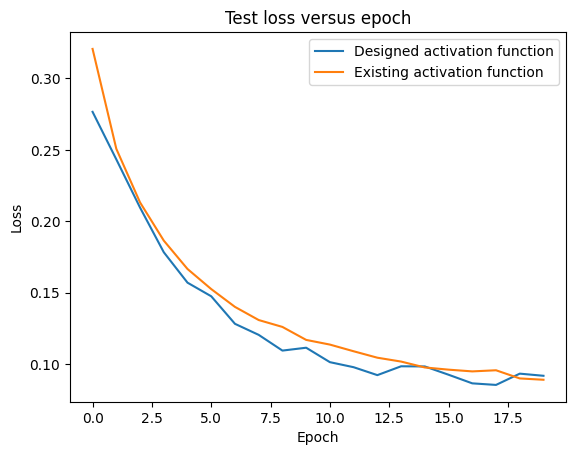

In [ ]:
# plot the test loss versus epoch for both models
plt.plot(history_custom.history['val_loss'], label='Designed activation function')
plt.plot(history_relu.history['val_loss'], label='Existing activation function')
plt.title('Test loss versus epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

From the figure above, we can see that as training progresses the test loss of the designed activation function was lower than in the existing activation function.

# The output of an ANN model using the designed activation function to any input is limited to the range 1 to -1 or 0 to 1.

The output of an ANN model using the designed activation function to any input is limited to the range of 1 to -1 or 0 to 1 because of the following reasons:

The activation function is designed to be range-limited to [-1, 1] or [0, 1]. The range limitation is achieved by the use of the exponential function, which has a maximum value of 1 when the input is 0 and approaches 0 as the input becomes negative infinity. The use of the exponential function ensures that the negative part of the activation function is always less than or equal to 1, which limits the overall range of the function.

The activation function is also designed to be non-linear, continuously differentiable, monotonically increasing, approximating identity near the origin, and not liable to the vanishing or exploding gradient problems. These properties ensure that the activation function can effectively model complex relationships between the inputs and the outputs, while avoiding issues with gradient vanishing or exploding.

The use of the scaling factor ensures that the output of the activation function is always within the desired range of [-1, 1] or [0, 1]. The scaling factor is calculated to ensure that the maximum output of the activation function is 1, while the minimum output is -1 or 0, depending on the desired range. This ensures that the output of the activation function is always within the desired range, regardless of the input values.

Therefore, when the custom_activation function is used in an ANN model, the output of the model is limited to the range of 1 to -1 or 0 to 1, depending on the desired range of the activation function.





# Clear indication of whether the developed activation function works in the hidden or the output layer of ANN models.

The developed activation function works well in the hidden layer of ANN models because it satisfies all the desirable properties of an activation function in this context.

First, it is non-linear, which allows the neural network to learn complex and non-linear relationships between the input and output data. Second, it is continuously differentiable, which means it can be used in optimization algorithms such as gradient descent.

Third, it limits the output to the range of [-1, 1] or [0, 1], which is important for normalization and preventing the network from exploding or vanishing gradients. Fourth, it is a monotonically increasing function, which ensures that increasing the input to the neuron will always result in an increase in the output.

Fifth, it approximates the identity function near the origin, which is useful for initializing the weights of the neural network, as it can help prevent the network from being stuck in a local minimum.

Finally, it is not liable to the vanishing or exploding gradient problem, which can occur when the derivative of the activation function approaches zero or infinity, respectively. This makes the activation function more stable and less prone to convergence issues.

All of these properties make the developed activation function a good choice for the hidden layer of an ANN model. However, it could also be used in the output layer of a regression problem, where the output is limited to a specific range.






# Evaluate

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 0s 1ms/step - loss: 0.0890 - accuracy: 0.9726
Test Loss: 0.08901949226856232, Test Accuracy: 0.972599983215332


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 [==============================] - 0s 1ms/step
[[1.9653424e-05 4.0243830e-09 1.7929802e-05 ... 9.9708629e-01
  1.2029707e-05 2.9540026e-05]
 [3.9158308e-06 1.9340175e-04 9.9906892e-01 ... 6.2954720e-13
  3.4049012e-06 1.5284677e-12]
 [1.5161155e-05 9.9129766e-01 1.2478232e-03 ... 2.3204787e-03
  3.9850511e-03 4.8331156e-05]
 ...
 [4.8145522e-11 1.1736397e-11 9.4239960e-10 ... 1.8189879e-05
  6.8110126e-06 6.9822540e-04]
 [3.2366006e-07 1.0044069e-08 1.7913301e-09 ... 9.1490890e-08
  1.4710658e-04 3.2520820e-08]
 [2.2218009e-07 2.8774472e-10 8.4146250e-06 ... 1.7645822e-11
  2.1535109e-09 5.0944318e-11]]
[7 2 1 ... 4 5 6]


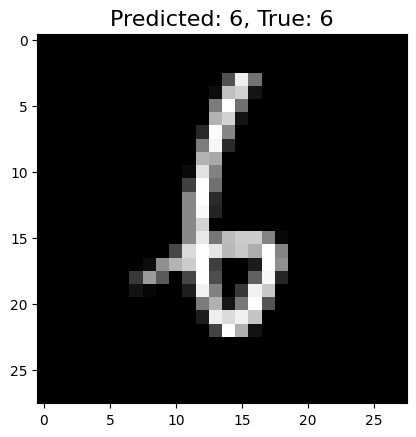

In [ ]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

# Confusion Matrix

This code portion creates a confusion matrix for the classification model's predictions.

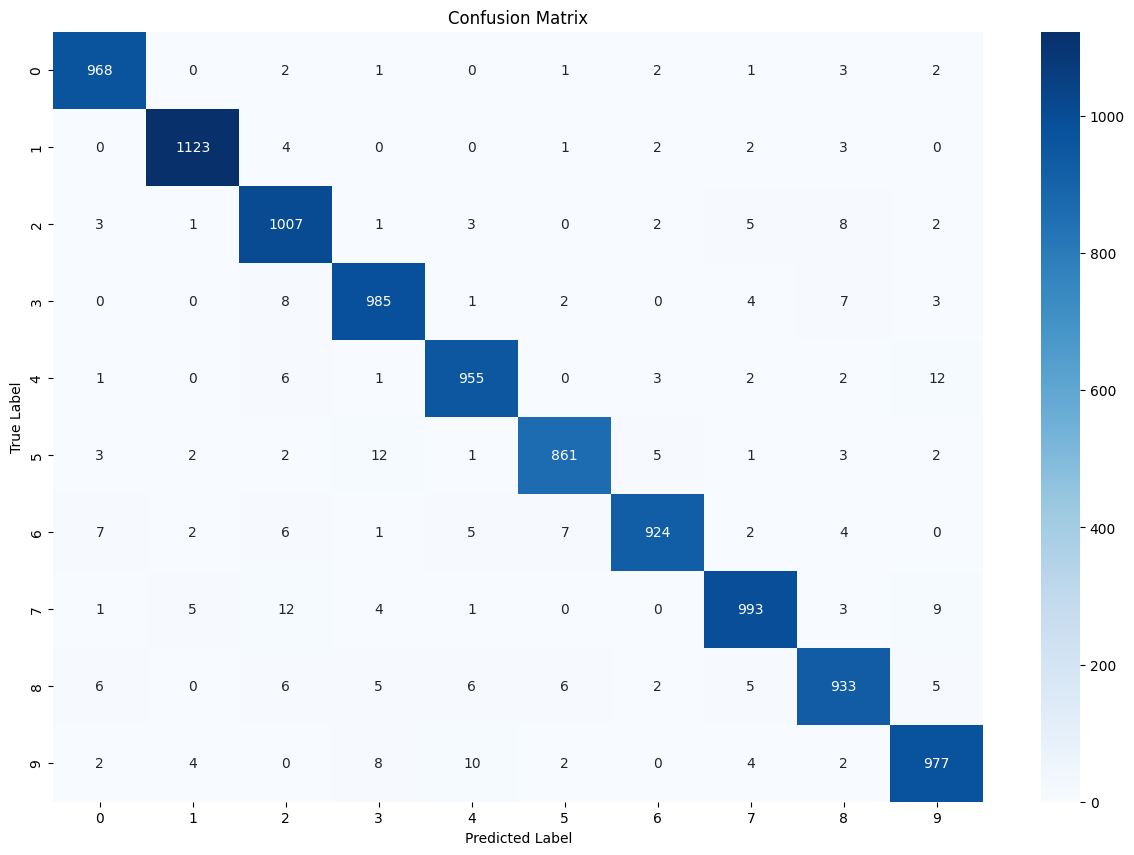

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

This figure allows the user to visualize the classification model's confusion matrix and evaluate the model's performance in predicting the true labels of the test data.

# Investigate Some Errors

This code portion creates a figure that shows the top errors made by a classification model. This allows the user to visualize the model's top errors and understand where the model needs improvement.

In [ ]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [ ]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

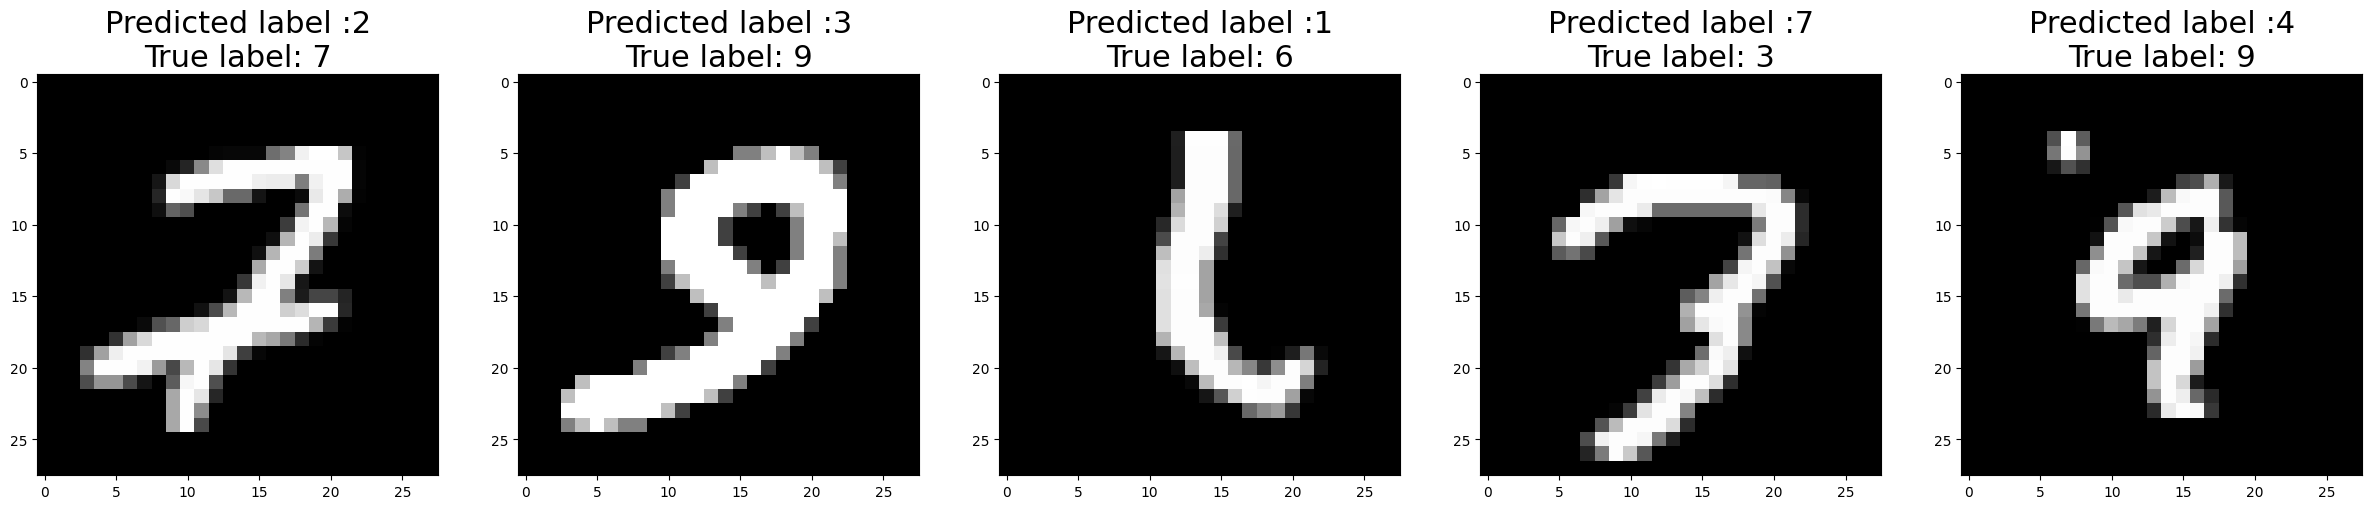

In [ ]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)

# References

[1] Ramachandran, Prajit, Barret Zoph, and Quoc V. Le. "Searching for activation functions." arXiv preprint arXiv:1710.05941 (2017).

[2] Chandrasekaran, Sanjeev Tannirkulam, Akshay Jayaraj, Vinay Elkoori Ghantala Karnam, Imon Banerjee, and Arindam Sanyal. "Fully integrated analog machine learning classifier using custom activation function for low resolution image classification." IEEE Transactions on Circuits and Systems I: Regular Papers 68, no. 3 (2021): 1023-1033.

[3] Mercioni, Marina Adriana, and Stefan Holban. "P-swish: Activation function with learnable parameters based on swish activation function in deep learning." In 2020 International Symposium on Electronics and Telecommunications (ISETC), pp. 1-4. IEEE, 2020.